In [1]:
import matplotlib.pyplot as plt 
import numpy as np                    
import pandas as pd                   
import seaborn as sns 

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'         

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist
from keras.models import Model, Sequential, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, UpSampling2D, Dropout, Dense, Flatten
from keras.callbacks import TensorBoard
from tensorflow.keras.datasets import mnist
import numpy as np
import keras
from keras import layers

2024-03-01 09:50:31.557109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 09:50:31.557180: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 09:50:31.602157: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 09:50:31.698754: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 09:50:33.118070: W tensorflow/compiler/tf2

In [2]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

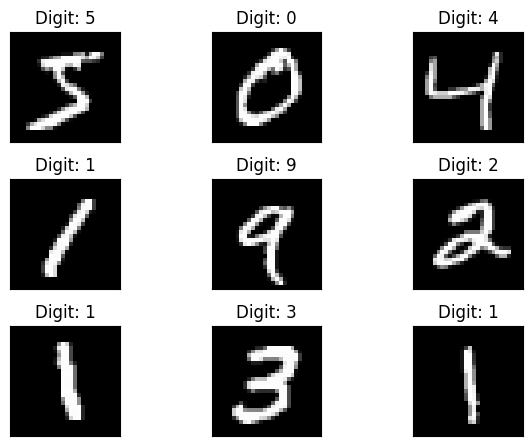

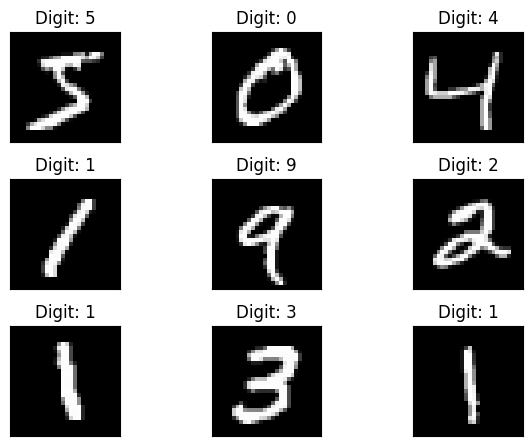

In [3]:

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

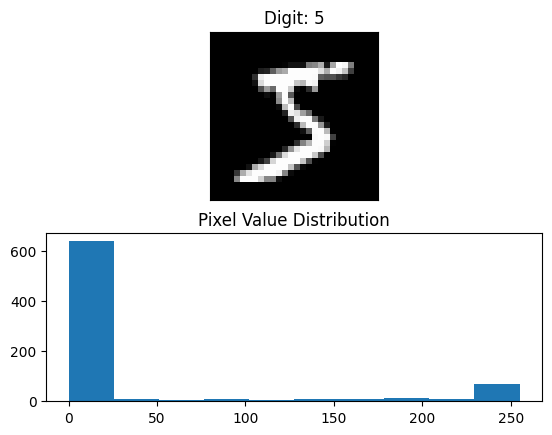

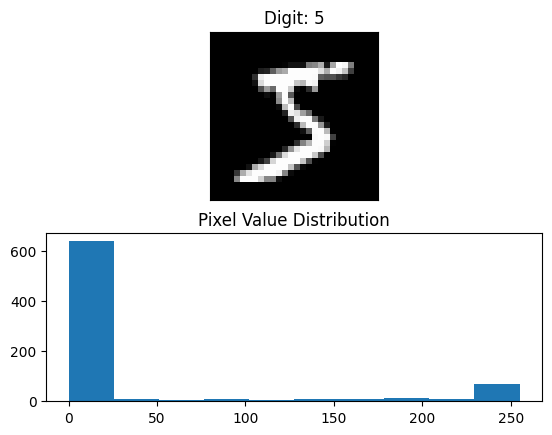

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
def model_arch():
    models = Sequential()
     
    # We are learning 64 
    # filters with a kernel size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu", 
                      input_shape=(28, 28, 1)))
     
    # Max pooling will reduce the
    # size with a kernel size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
     
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same", 
                      activation="relu"))
     
    models.add(MaxPooling2D(pool_size=(2, 2)))
     
    # Once the convolutional and pooling 
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
     
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

In [7]:
from keras.utils import to_categorical

# Convertir les étiquettes de vérité terrain en one-hot encoding
y_test_encoded = to_categorical(y_test)



In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5724145681377703411
xla_global_id: -1
]


2024-03-01 09:50:37.042055: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [9]:
# Créer le modèle en utilisant la fonction model_arch()
model = model_arch()

# Compiler le modèle avec la perte, l'optimiseur et les métriques spécifiés
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Afficher un résumé du modèle pour vérifier son architecture
model.summary()

# Évaluer le modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)  # Assurez-vous que vous utilisez y_test pour les étiquettes
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0